# Original

https://www.kaggle.com/code/chebotinaa/a-b-testing-of-fast-food-marketing-campaign/notebook

# About Dataset

## Scenario

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introducted at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

![image](https://github.com/Sameta-cani/food_classification_proj/assets/83288284/5722fa4e-9272-4425-ac29-3371121235b8)

A/B testing plays a critical role in decision-making processes across various industries. It is a method of comparing and testing the effectiveness and benefits of two (or more) different business strategies and finding the strategy that works best. Running A/B testing helps businesses save time and money that could have been wasted if the chosen strategy didn't work.

In marketing, A/B tests can be used in many areas:
- improving email open rates
- advertisements on social media
- product recommendations on your web page
- testing different pictures of descriptions of your product and many more

## Goal

Evaluate A/B testing results and decide which marketing strategy works the best.

## Columns

- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that were tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [36]:
from scipy import stats

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%reload_ext autotime

time: 0 ns (started: 2024-07-09 01:10:44 +09:00)


In [37]:
!kaggle datasets download -d chebotinaa/fast-food-marketing-campaign-ab-test

fast-food-marketing-campaign-ab-test.zip: Skipping, found more recently modified local copy (use --force to force download)
time: 1.27 s (started: 2024-07-09 01:10:44 +09:00)


In [38]:
with zipfile.ZipFile('./fast-food-marketing-campaign-ab-test.zip', 'r') as zip_ref:
    zip_ref.extractall()

time: 0 ns (started: 2024-07-09 01:10:46 +09:00)


In [39]:
data = pd.read_csv('./WA_Marketing-Campaign.csv')

data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


time: 16 ms (started: 2024-07-09 01:10:46 +09:00)


In [40]:
# 프로모션별로 그룹핑하고 매출 합계 및 비율 계산
SalesDist = (data.groupby("Promotion", as_index=False)['SalesInThousands']
            .agg(Sales='sum')
            .assign(Percentage=lambda x: round(x['Sales'] / x['Sales'].sum() * 100)))

SalesDist

,Promotion,Sales,Percentage
0,1,9993.03,34.0
1,2,8897.93,30.0
2,3,10408.52,36.0


time: 15 ms (started: 2024-07-09 01:10:46 +09:00)


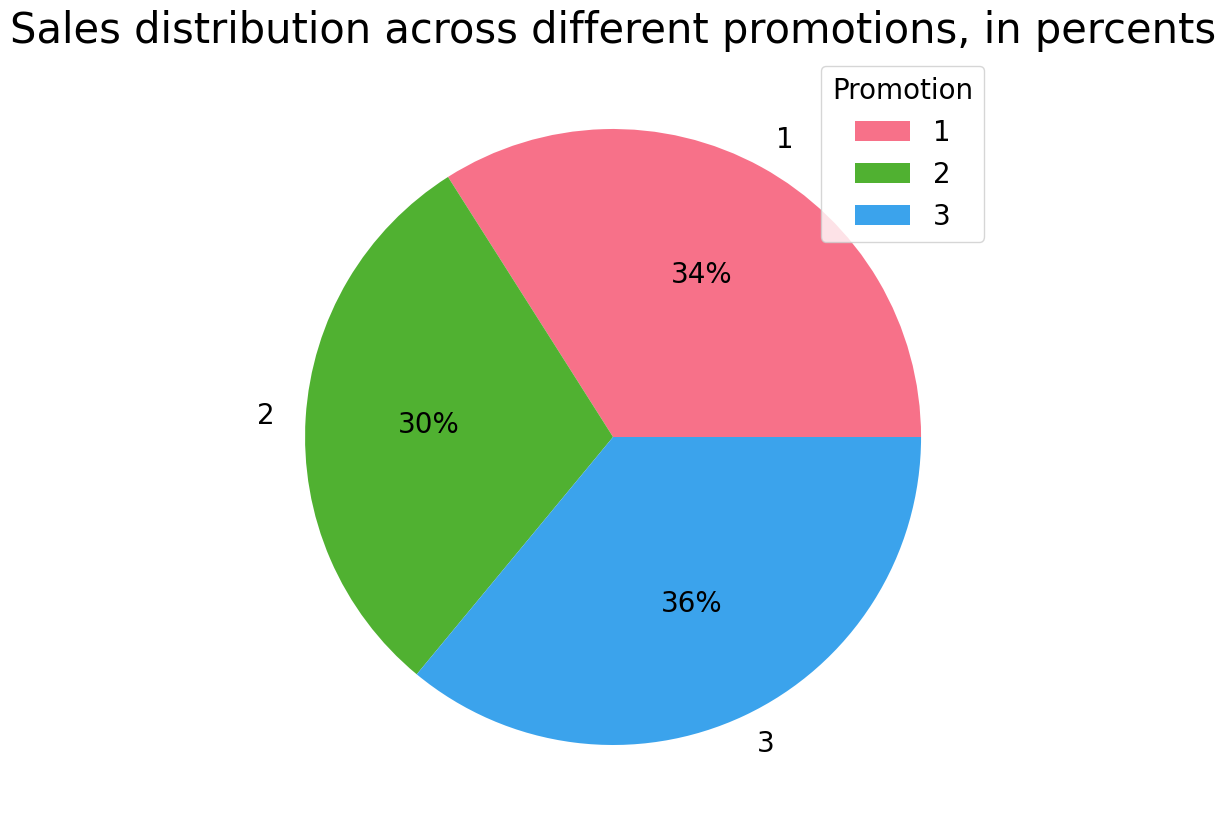

time: 125 ms (started: 2024-07-09 01:10:46 +09:00)


In [41]:
# 파이 차트 시각화
plt.figure(figsize=(20, 10))
plt.title("Sales distribution across different promotions, in percents", fontsize=30)

# 파이 차트 생성
plt.pie(SalesDist['Percentage'], labels=SalesDist['Promotion'], autopct='%1.0f%%', colors=sns.color_palette("husl", len(SalesDist)), textprops={'fontsize': 20})

# 범례 설정
plt.legend(title="Promotion", fontsize=20, title_fontsize=20, loc='best')
plt.show()

As we can see from this chart, the promotion **group 3 has the largest aggregate sales amount(36%).** However, **each promotion group takes roughly one third** of the total sales during the promotion weeks.

Let's look at the **market sizes** in each promotion group.

<Figure size 2000x1000 with 0 Axes>

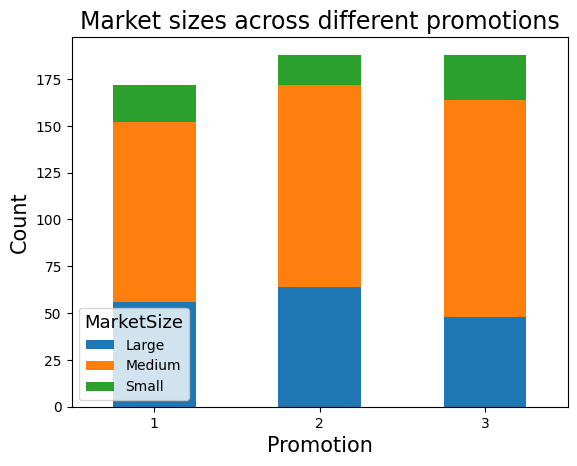

time: 125 ms (started: 2024-07-09 01:10:46 +09:00)


In [42]:
# Promotion과 MarketSize별로 그룹핑하고 Count 계산
Market = data.groupby(['Promotion', 'MarketSize']).size().reset_index(name='Count')

# 피벗 테이블 생성
Market_pivot = Market.pivot(index='Promotion', columns='MarketSize', values='Count').fillna(0)

# 시각화
plt.figure(figsize=(20, 10))
Market_pivot.plot(kind='bar', stacked=True)

# 레이블 및 타이틀 설정
plt.title("Market sizes across different promotions", fontsize=17)
plt.xlabel("Promotion", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.legend(title="MarketSize", fontsize=10, title_fontsize=13)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.show()

Here we see that the **medium market size occupies the most** among all three promotion groups, while the small market size occupies the least.

Now I'm going to explore the **AgeOfStore** column:

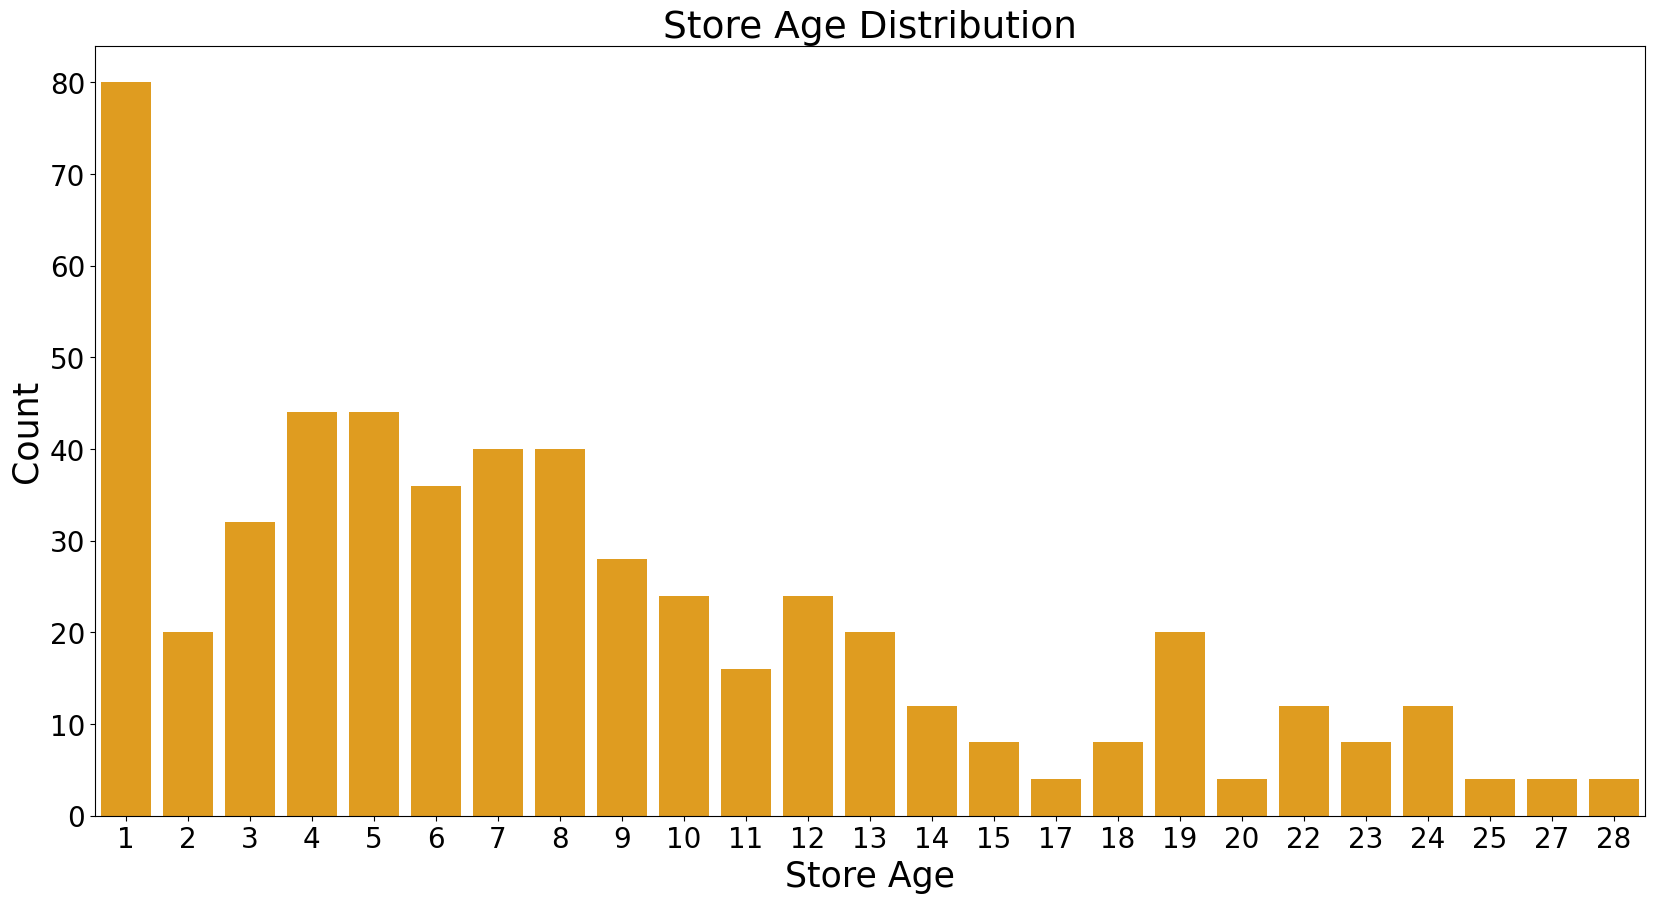

time: 219 ms (started: 2024-07-09 01:10:46 +09:00)


In [43]:
Age = data.groupby('AgeOfStore').size().reset_index(name='Count')

plt.figure(figsize=(20, 10))
plt.title("Store Age Distribution", fontsize=27)

sns.barplot(x="AgeOfStore", y="Count", data=Age, color="orange")

plt.xlabel("Store Age", fontsize=25)
plt.ylabel("Count", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The majority of stores are **10 years old or less.** A large number of stores are **1 year old.**

Let's look at the age of stores in different promotion groups.

In [44]:
summary = data.groupby('Promotion')['AgeOfStore'].describe()

summary

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


time: 15 ms (started: 2024-07-09 01:10:46 +09:00)


We see that all three groups seem to have store age profiles. **The average** ages (Mean) of stores for the three groups are **8-9 years** old and **the majority** of the stores are **10-12 years** old or younger.

After exploring the distribution of the variables in the three promotion groups, I can verify that the sample groups are similar and the **A/B testing results will be meaningful and trustworthy.**

## Hypothesis testing

As I mentioned before, it's important to test your hypothesis and seek statistically significant differences among test groups when you run A/B tests. **T-test** is frequently used for that. The t-test compares the two averages and examines whether they are significantly different from each other.

There are two important statistics in t-test -the t-value and p-value. The **t-value** measures the degree of difference relative to the variation in the data. The larger the t-value is, the more difference three is between two testing groups. **P-value** measures the probability that the result would occur by chance. So the smaller the p-value is, the more statistically significant difference there is between two testing groups.

There is a concept of the null hypothesis and the alternate hypothesis. **The null hypothesis** states that the two groups show no statistically significant difference. **The alternate hypothesis** states the two groups shows a statistically significant difference.

### Computing the t-value and p-value from the equations

There are three things we need to compute to get the t-value: the mean, the standard deviation, and the number of samples.

In [45]:
promo_1 = data[data['Promotion'] == 1]['SalesInThousands']
promo_2 = data[data['Promotion'] == 2]['SalesInThousands']
promo_3 = data[data['Promotion'] == 3]['SalesInThousands']

# mean
mean_1 = promo_1.mean()
mean_2 = promo_2.mean()
mean_3 = promo_3.mean()

# standard deviation
std_1 = promo_1.std()
std_2 = promo_2.std()
std_3 = promo_3.std()

# number of samples
n_1 = promo_1.count()
n_2 = promo_2.count()
n_3 = promo_3.count()

# printing mean
print(f"Mean of Promotion 1: {mean_1}\nMean of Promotion 2: {mean_2}\nMean of Promotion 3: {mean_3}")


Mean of Promotion 1: 58.09901162790698
Mean of Promotion 2: 47.32941489361701
Mean of Promotion 3: 55.36446808510639
time: 0 ns (started: 2024-07-09 01:10:46 +09:00)


In [46]:
# t-value comparing promotion 1 and promotion 2
t_value = (mean_1 - mean_2) / np.sqrt(std_1**2/n_1 + std_2**2/n_2)
# computing the degrees of freedom
df_1_2 = n_1 + n_2 - 2
# computing p-value using sf function
p_value = 2 * stats.t.sf(t_value, df_1_2)

# printing t-value and p-value
print(f"T-statistic: {t_value}, P-value: {p_value}")

T-statistic: 6.42752867090748, P-value: 4.143297217708428e-10
time: 0 ns (started: 2024-07-09 01:10:46 +09:00)


We got the **t-value of 6.4275** and **p-value of 4.143e-10** (which is an extremely small number) that suggest that there is strong evidence against the null hypothesis and that the **difference between promotion 1 and promotion 2 is significant and promotion 1 outperform promotion 2.**

Let's repeat the same evaluation for promotion group 1 and promotion group3.

In [47]:
# t-value comparing promotion 1 and promotion 3
t_value = (mean_1 - mean_3) / np.sqrt(std_1**2/n_1 + std_3**2/n_3)
# computing the degrees of freedom
df_1_3 = n_1 + n_3 - 2
# computing p-value and using sf function
p_value = 2 * stats.t.sf(t_value, df_1_3)

# printing t-value, p-value
print(f"T-statistic: {t_value}, P-value: {p_value}")

T-statistic: 1.5560224307758632, P-value: 0.12058631176434828
time: 0 ns (started: 2024-07-09 01:10:46 +09:00)


Here we got the t-value of 1.5560 and p-value of 0.1205 (which is much higher than 0.05). This result suggests that **there is no statistically significant difference between promotion groups1 and 3** even though the average sales from promotioin group1 (58.1) is higher than in group 3 (55.36).

From this evaluation, I can say that promotion 1 and promotion 3 perform better than promotion2, but the defference between promotion 1 and promotion 3 is not statistically significant. So **the company can use both 1 and 3 marketing strategies for their fast-food retail chain.**

## Computing the t-value and p-value using stats.ttest_ind

In [48]:
# t-test between promo 1 and promo 2
t_stat, p_value = stats.ttest_ind(promo_1, promo_2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(f"Mean of Promotion 1: {mean_1}, Mean of Promotion 2: {mean_2}")

T-statistic: 6.453671702181005, P-value: 3.5506696512134566e-10
Mean of Promotion 1: 58.09901162790698, Mean of Promotion 2: 47.32941489361701
time: 0 ns (started: 2024-07-09 01:10:46 +09:00)


So **we got the same result using `scipy.stats.ttest_ind()`.** Let's check promotion 1 and promotion 3.

In [49]:
# t-test between promo 1 and promo 3
t_stat, p_value = stats.ttest_ind(promo_1, promo_3)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(f"Mean of Promotion 1: {mean_1}, Mean of Promotion 3: {mean_3}")

T-statistic: 1.5551383687293547, P-value: 0.12079667272313277
Mean of Promotion 1: 58.09901162790698, Mean of Promotion 3: 55.36446808510639
time: 0 ns (started: 2024-07-09 01:10:46 +09:00)


Whether I use the previous approach of manually computing the t-value and p-value or the approach of using `scipy.stats.ttest_ind()`, I got the same result - **promotion 1 and 3 outperform promotion 2.**

# Summary

A/B testing is a powerful technique that businesses can use to evaluate new ideas and marketing strategies before fully committing to one or another.

Given this information, the most effective promotions are Promotions 1 and 3. However, since the difference between Promotion 1 and Promotion 3 is not statistically significant, you could consider other factors beyond just the sales figures to make a decision. These factors might include:

- **Cost of Implementation**: If one promotion is significantly cheaper to run than the other, that might sway your decision.
- **Customer Feedback**: If you have qualitative data on customer satisfaction or brand perception, that could be valuable.
- **Market Segmentation**: If one promotion works better with a specific segment of your market that you want to target, that could be a deciding factor.
- **Sustainability**: Long-term viability and the potential for continued engagement could also be critical.
  
In this analysis, Promotion 1 seems like a safe bet since it significantly outperforms Promotion 2 and has a higher average sales figure than Promotion 3. However, if the costs or other factors heavily favor Promotion 3, it could still be a viable option.